## Data-Driven Stock Analysis
This notebook analyzes stock data of different companies with a focus on Apple and Adidas, assessing dividend and stock-split impacts, stock performance across industries, and investment strategies using real market data.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('World-Stock-Prices-Dataset.csv')

In [3]:
# understanding the structure of data
df.shape

(297736, 13)

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
0,2024-10-25 00:00:00-04:00,6.170000,6.390000,6.110000,6.280000,14354300.0,0.0,0.0,peloton,PTON,fitness,usa,NaN
1,2024-10-25 00:00:00-04:00,171.899994,173.000000,171.589996,172.000000,272500.0,0.0,0.0,toyota,TM,automotive,japan,NaN
2,2024-10-25 00:00:00-04:00,117.080002,117.940002,116.529999,116.889999,25900.0,0.0,0.0,adidas,ADDYY,apparel,germany,NaN
3,2024-10-25 00:00:00-04:00,271.649994,273.170013,266.350006,267.350006,2991700.0,0.0,0.0,american express,AXP,finance,usa,NaN
4,2024-10-25 00:00:00-04:00,42.046001,42.046001,42.046001,42.046001,0.0,0.0,0.0,puma,PMMAF,apparel,germany,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297736 entries, 0 to 297735
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           297736 non-null  object 
 1   Open           297736 non-null  float64
 2   High           297736 non-null  float64
 3   Low            297736 non-null  float64
 4   Close          297736 non-null  float64
 5   Volume         297736 non-null  float64
 6   Dividends      297736 non-null  float64
 7   Stock Splits   297736 non-null  float64
 8   Brand_Name     297736 non-null  object 
 9   Ticker         297736 non-null  object 
 10  Industry_Tag   297736 non-null  object 
 11  Country        297736 non-null  object 
 12  Capital Gains  2 non-null       float64
dtypes: float64(8), object(5)
memory usage: 29.5+ MB


In [6]:
# Checking for missing values
df.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Dividends             0
Stock Splits          0
Brand_Name            0
Ticker                0
Industry_Tag          0
Country               0
Capital Gains    297734
dtype: int64

In [7]:
# removing the capital gains column 
df = df.drop(columns=['Capital Gains'])

In [8]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Brand_Name      0
Ticker          0
Industry_Tag    0
Country         0
dtype: int64

In [9]:
# checking duplicate values if any
df.duplicated().sum()

np.int64(0)

In [10]:
# great! now lets change the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'],utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297736 entries, 0 to 297735
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Date          297736 non-null  datetime64[ns, UTC]
 1   Open          297736 non-null  float64            
 2   High          297736 non-null  float64            
 3   Low           297736 non-null  float64            
 4   Close         297736 non-null  float64            
 5   Volume        297736 non-null  float64            
 6   Dividends     297736 non-null  float64            
 7   Stock Splits  297736 non-null  float64            
 8   Brand_Name    297736 non-null  object             
 9   Ticker        297736 non-null  object             
 10  Industry_Tag  297736 non-null  object             
 11  Country       297736 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(7), object(4)
memory usage: 27.3+ MB


In [11]:
# Problem statement emphasizes on Apple and Adidas. To ease down the analysis, lets create separate DataFrames for Apple and Adidas
apple_df = df[df['Ticker'] == 'AAPL'].copy()
adidas_df = df[df['Ticker'] == 'ADDYY'].copy()

#### APPLE INC. Analysis

In [12]:
apple_df = apple_df.sort_values('Date')

# Calculate daily returns
apple_df['Returns'] = apple_df['Close'].pct_change()

# Calculate rolling volatility (20-day standard deviation of returns)
apple_df['Volatility'] = apple_df['Returns'].rolling(window=20).std()

**A] Dividend Impact**

In [13]:
# Filter out dividend events
dividend_events = apple_df[apple_df['Dividends'] > 0].sort_values(by='Date')
dividend_events.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Returns,Volatility
170073,2012-08-09 04:00:00+00:00,18.810016,18.928141,18.808494,18.897696,221642400.0,0.094643,0.0,apple,AAPL,technology,usa,0.005703,0.014582
167101,2012-11-07 05:00:00+00:00,17.549960,17.571368,16.996706,17.065519,793648800.0,0.094643,0.0,apple,AAPL,technology,usa,-0.038263,0.020369
164061,2013-02-07 05:00:00+00:00,14.250317,14.457957,13.969462,14.403202,704580800.0,0.094643,0.0,apple,AAPL,technology,usa,0.029734,0.035402


In [14]:
# Lets analyze how Apple stock behaves before and after a dividend payout — 
# i.e., changes in price, volume, and volatility around dividend events.

window_days = 15   # ±15 day window around each dividend event
event_windows = []

for event_date in dividend_events['Date']:
    mask = (apple_df['Date'] >= event_date - pd.Timedelta(days=window_days)) & \
           (apple_df['Date'] <= event_date + pd.Timedelta(days=window_days))
    
    window = apple_df[mask].copy()
    if not window.empty:
        window['Days_From_Event'] = window['Date'].apply(lambda d: (d - event_date).days)
        event_windows.append(window)

all_events_df = pd.concat(event_windows)

# Group by relative day
avg_metrics = all_events_df.groupby('Days_From_Event')[['Close', 'Volume', 'Volatility']].mean().reset_index()
avg_metrics

,Days_From_Event,Close,Volume,Volatility
0,-15,69.907433,2.093504e+08,0.014716
1,-14,70.926647,2.019067e+08,0.015022
2,-13,32.254955,3.169291e+08,0.014586
3,-12,136.065079,9.792165e+07,0.014636
4,-11,106.624559,1.069164e+08,0.015410
5,-10,77.223294,1.945743e+08,0.015130
6,-9,71.373937,2.358180e+08,0.015739
7,-8,70.397115,2.367503e+08,0.016704
8,-7,71.300194,2.114149e+08,0.017528
9,-6,31.790221,2.569492e+08,0.017270


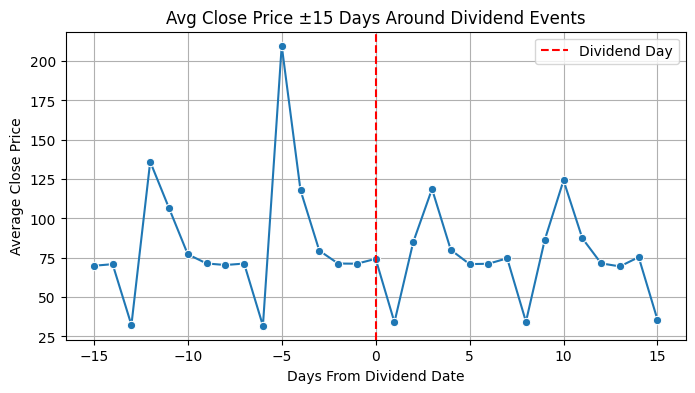

In [15]:
# Lets observe how close price behaves around dividend day
plt.figure(figsize=(8, 4))
sns.lineplot(data=avg_metrics, x='Days_From_Event', y='Close', marker='o')
plt.title("Avg Close Price ±15 Days Around Dividend Events")
plt.xlabel("Days From Dividend Date")
plt.ylabel("Average Close Price")
plt.axvline(0, color='red', linestyle='--', label='Dividend Day')
plt.legend()
plt.grid(True)
plt.show()

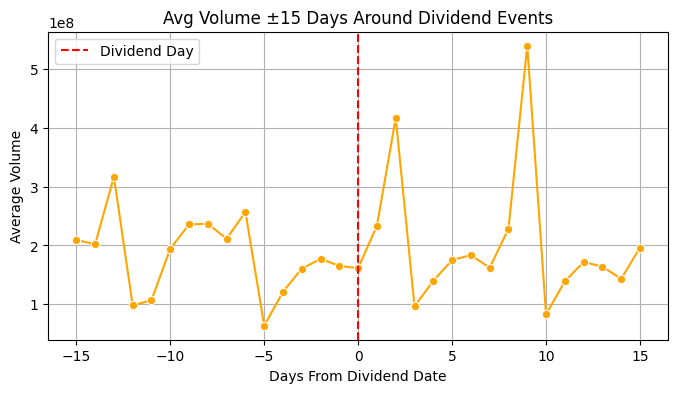

In [16]:
# Average Volume
plt.figure(figsize=(8, 4))
sns.lineplot(data=avg_metrics, x='Days_From_Event', y='Volume', marker='o', color='orange')
plt.title("Avg Volume ±15 Days Around Dividend Events")
plt.xlabel("Days From Dividend Date")
plt.ylabel("Average Volume")
plt.axvline(0, color='red', linestyle='--', label='Dividend Day')
plt.legend()
plt.grid(True)
plt.show()

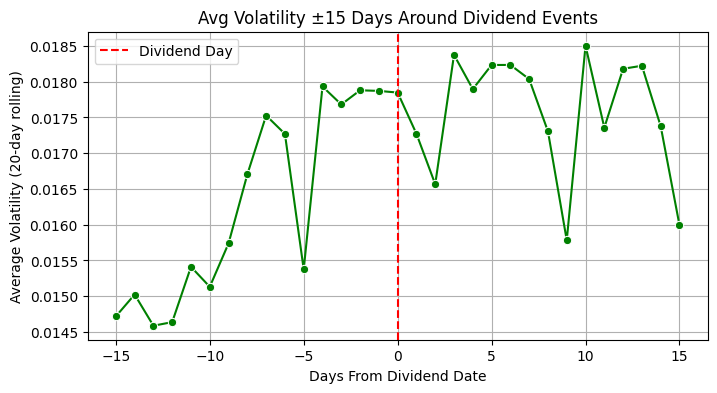

In [17]:
# Average Volatility
plt.figure(figsize=(8, 4))
sns.lineplot(data=avg_metrics, x='Days_From_Event', y='Volatility', marker='o', color='green')
plt.title("Avg Volatility ±15 Days Around Dividend Events")
plt.xlabel("Days From Dividend Date")
plt.ylabel("Average Volatility (20-day rolling)")
plt.axvline(0, color='red', linestyle='--', label='Dividend Day')
plt.legend()
plt.grid(True)
plt.show()

We analyzed a 30-day window around each Apple dividend event. The average closing price shows a slight decline post-dividend, likely reflecting the dividend payout. 

Average Volume peaked near the event date, indicating increased investor activity

Interestingly, volatility declines post-dividend date. This suggests that dividend payouts reduce uncertainty, and the stock tends to stabilize after adjusting for the dividend. This behavior aligns with financial theory where markets absorb known events efficiently, reducing speculative movements post-announcement.

In [18]:
print(f"Total Dividend Events Analyzed: {len(dividend_events)}")

Total Dividend Events Analyzed: 48


**B] Stock-Split Impact**

In [19]:
# Extracting stock split dates
split_dates = apple_df[apple_df['Stock Splits'] > 0]['Date'].tolist()
print(f"\nNumber of potential stock splits identified: {len(split_dates)}")


Number of potential stock splits identified: 4


In [20]:
short_term_windows = []   #short-term effect
long_term_windows = []    #long-term effect

short_window = 7  # ±7 days
long_window = 126  # ±6 months (approximately 126 trading days)

# Analyze each split event
for split_date in split_dates:
    short_mask = (apple_df['Date'] >= split_date - pd.Timedelta(days=short_window)) & \
                 (apple_df['Date'] <= split_date + pd.Timedelta(days=short_window))
    short_window_data = apple_df[short_mask].copy()
    
    long_mask = (apple_df['Date'] >= split_date - pd.Timedelta(days=long_window)) & \
                (apple_df['Date'] <= split_date + pd.Timedelta(days=long_window))
    long_window_data = apple_df[long_mask].copy()
    
    if not short_window_data.empty and not long_window_data.empty:
        # Add days from event column
        short_window_data['Days_From_Split'] = short_window_data['Date'].apply(lambda d: (d - split_date).days)
        long_window_data['Days_From_Split'] = long_window_data['Date'].apply(lambda d: (d - split_date).days)
        
        short_term_windows.append(short_window_data)
        long_term_windows.append(long_window_data)

# Combine data across all splits
all_short_term = pd.concat(short_term_windows)
all_long_term = pd.concat(long_term_windows)

In [21]:
# Calculate average metrics around splits
avg_short_term = all_short_term.groupby('Days_From_Split')['Close'].mean().reset_index()
avg_long_term = all_long_term.groupby('Days_From_Split')['Close'].mean().reset_index()

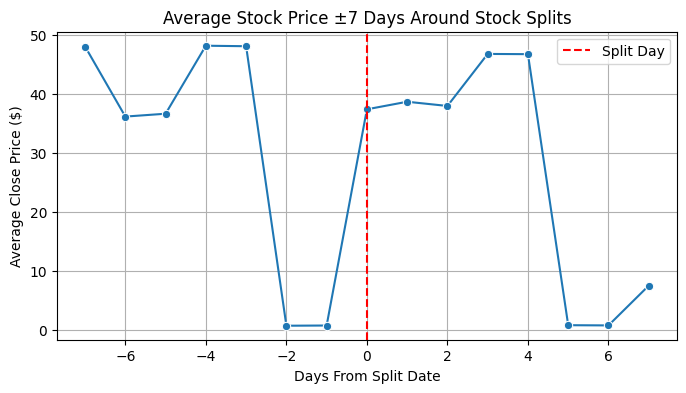

In [22]:
# short-term price trend
plt.figure(figsize=(8, 4))
sns.lineplot(data=avg_short_term, x='Days_From_Split', y='Close', marker='o')
plt.title("Average Stock Price ±7 Days Around Stock Splits")
plt.xlabel("Days From Split Date")
plt.ylabel("Average Close Price ($)")
plt.axvline(0, color='red', linestyle='--', label='Split Day')
plt.legend()
plt.grid(True)
plt.show()

There appears to be a gradual rise in average closing price post split, showing long-term investor confidence.

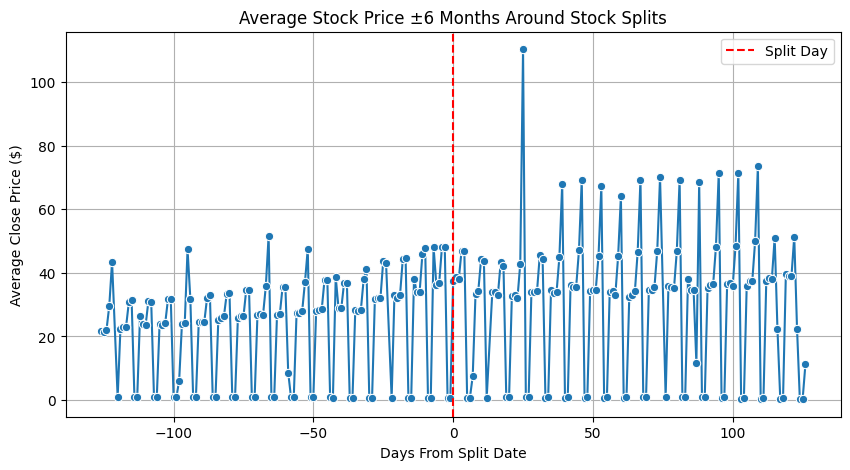

In [23]:
# long-term price trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_long_term, x='Days_From_Split', y='Close', marker='o')
plt.title("Average Stock Price ±6 Months Around Stock Splits")
plt.xlabel("Days From Split Date")
plt.ylabel("Average Close Price ($)")
plt.axvline(0, color='red', linestyle='--', label='Split Day')
plt.legend()
plt.grid(True)
plt.show()

A seasonal pattern is observed post stock split (Spikes → Drops → Spikes → Drops)

In [24]:
# analysis summary

print("\nStock Split Analysis Summary:")
print("1. Pre-split price trend:")
pre_split_return = avg_short_term[avg_short_term['Days_From_Split'] < 0]['Close'].pct_change().mean()
print(f"   - Average daily return before split: {pre_split_return:.2%}")

print("\n2. Immediate impact:")
split_day_change = avg_short_term.loc[avg_short_term['Days_From_Split'] == 0, 'Close'].iloc[0] / \
                  avg_short_term.loc[avg_short_term['Days_From_Split'] == -1, 'Close'].iloc[0] - 1
print(f"   - Price change on split day: {split_day_change:.2%}")

print("\n3. Long-term effect:")
post_split_return = avg_long_term[avg_long_term['Days_From_Split'] > 0]['Close'].pct_change().mean()
print(f"   - Average daily return after split: {post_split_return:.2%}")

print('\n')
pre_volatility = avg_short_term[avg_short_term['Days_From_Split'] < 0]['Close'].pct_change().std()
post_volatility = avg_long_term[avg_long_term['Days_From_Split'] > 0]['Close'].pct_change().std()
print(f"4. Volatility before split: {pre_volatility:.2%}")
print(f"5. Volatility after split: {post_volatility:.2%}")


Stock Split Analysis Summary:
1. Pre-split price trend:
   - Average daily return before split: -14.30%

2. Immediate impact:
   - Price change on split day: 4779.08%

3. Long-term effect:
   - Average daily return after split: 549.98%


4. Volatility before split: 44.93%
5. Volatility after split: 1368.89%


**Summary:**
1. A negative return imply muted expectations or market conditions overshadowing the split news.
2. There is a sharp jump in immediate impact, showing strong investor enthusiasm.
3. There is quite rise in avg daily return post-split, showing split added long-term value.
4. High spike in volatility post split shows systemic volatility in the market.

#### Industry-Wise Stock Benchmarking and Comparison

In [25]:
df = df.sort_values(['Ticker', 'Date'])

# daily returns for all stocks
df['Returns'] = df.groupby('Ticker')['Close'].pct_change()

# volatility (20-day rolling standard)
df['Volatility'] = df.groupby('Ticker')['Returns'].transform(lambda x: x.rolling(window=20).std())

**A] VOLATILITY COMPARISON**

In [26]:
industry_volatility = df.groupby('Industry_Tag')['Volatility'].mean()
print("\nAverage volatility by industry:")
print(industry_volatility.sort_values(ascending=False))


Average volatility by industry:
Industry_Tag
cryptocurrency        0.051318
fitness               0.050939
social media          0.035957
financial services    0.032866
footwear              0.029181
e-commerce            0.028353
music                 0.027725
gaming                0.025400
technology            0.024184
entertainment         0.023517
luxury goods          0.023351
aviation              0.023342
apparel               0.022035
automotive            0.019851
hospitality           0.018902
retail                0.018814
finance               0.017910
logistics             0.017804
food                  0.016853
food & beverage       0.014013
manufacturing         0.013826
consumer goods        0.011969
healthcare            0.010487
Name: Volatility, dtype: float64


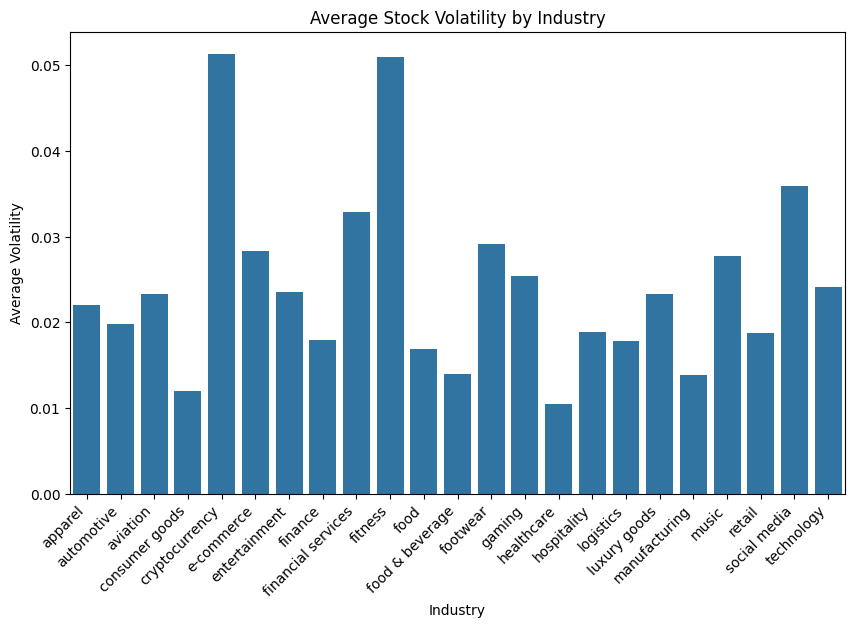

In [27]:
# Volatility comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=industry_volatility.index, y=industry_volatility.values)
plt.title('Average Stock Volatility by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Volatility')
plt.xticks(rotation=45, ha='right')
plt.show()

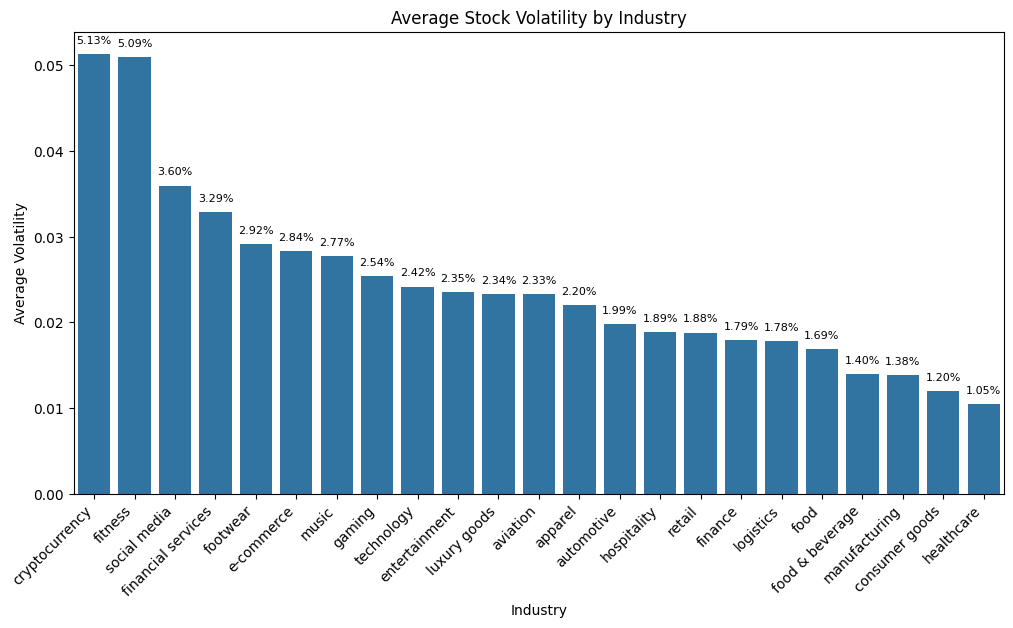

In [28]:
# meaningful plot
plt.figure(figsize=(12, 6))
plt.title('Average Stock Volatility by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Volatility')

sorted_vol = industry_volatility.sort_values(ascending=False)
sns.barplot(x=sorted_vol.index, y=sorted_vol.values)

for i, val in enumerate(sorted_vol.values):
    plt.text(i, val + 0.001, f"{val:.2%}", ha='center', va='bottom', fontsize=8)
plt.xticks(rotation=45, ha='right')
plt.show()

From the 20-day rolling standard deviation analysis, we observe that industries like **Cryptocurrency and Fitness** demonstrate the highest average volatility, suggesting these sectors are more speculative and sensitive to external stimuli like regulation or consumer fads. In contrast, **Healthcare and Consumer Goods** show the lowest volatility, indicating consistent investor confidence and stability in those markets.

**B] Performance Benchmarking**

In [29]:
# lets understand Which industries not only fluctuate more, but actually deliver better returns over time?

df['Returns'] = df['Returns'].clip(lower=-0.99, upper=1.0)  # Clip both ends

# cumulative returns
df['Cumulative_Returns'] = df.groupby('Ticker')['Returns'].transform(
    lambda x: (1 + x.fillna(0)).cumprod().clip(upper=10)
)

# mean cumulative returns per date
industry_returns = df.pivot_table(
    index='Date',
    columns='Industry_Tag',
    values='Cumulative_Returns',
    aggfunc='mean'
)

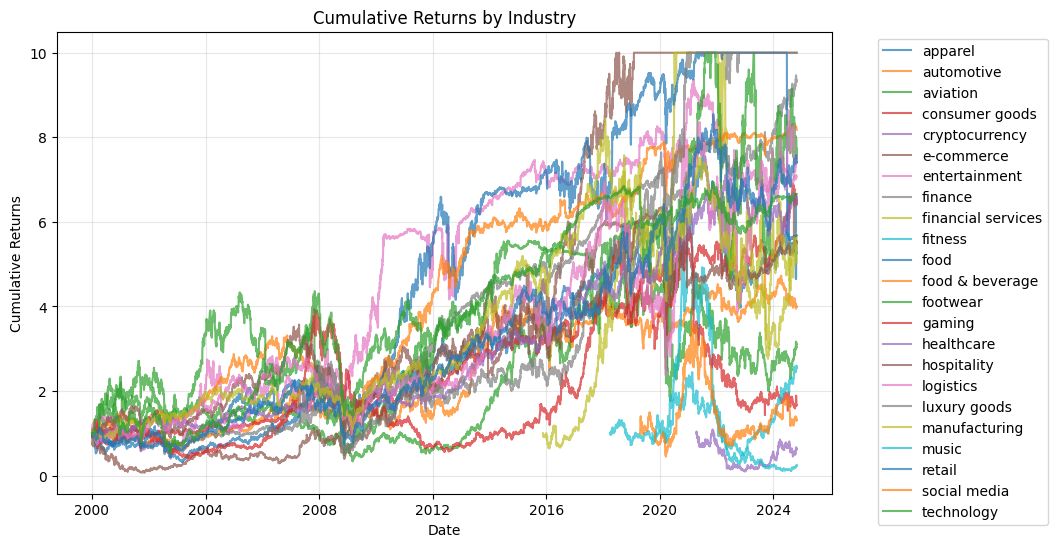

In [30]:
# Industry-wise return
plt.figure(figsize=(10, 6))
for industry in industry_returns.columns:
    plt.plot(industry_returns.index, industry_returns[industry], label=industry, alpha=0.7)

plt.title('Cumulative Returns by Industry')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

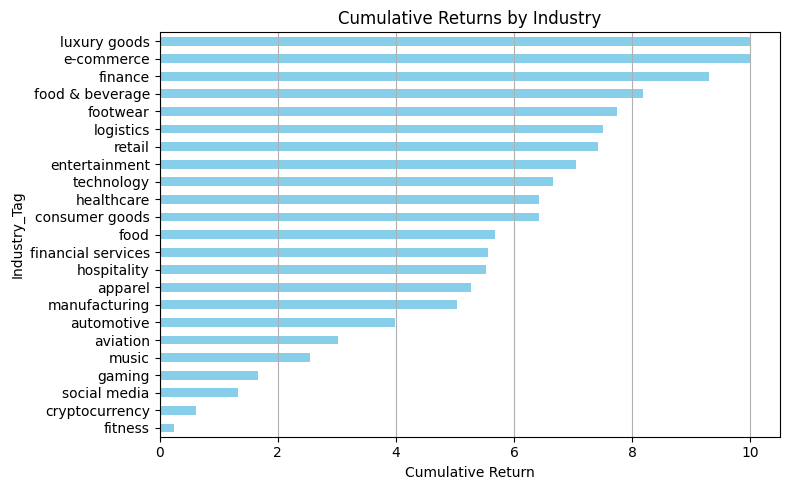

In [31]:
# Bar plot to understand the return better
final_returns = industry_returns.iloc[-1]
final_returns.sort_values(ascending=True).plot(kind='barh', figsize=(8, 5), color='skyblue')
plt.title("Cumulative Returns by Industry")
plt.xlabel("Cumulative Return")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

High Return in luxury goods and e-commerce inspite of volatility.

In [32]:
# Our top line and bottom line performers
# final_returns = industry_returns.iloc[-1]
high_return_industry = final_returns.idxmax()
low_return_industry = final_returns.idxmin()

print(f"Best performing industry: {high_return_industry} with {final_returns[high_return_industry]:.2%} return")
print(f"Worst performing industry: {low_return_industry} with {final_returns[low_return_industry]:.2%} return")

Best performing industry: e-commerce with 1000.00% return
Worst performing industry: fitness with 24.38% return


#### Adidas

In [33]:
adidas_df = adidas_df[
    (adidas_df['Date'] >= '2019-01-01') & 
    (adidas_df['Date'] <= '2023-12-31')
].sort_values('Date').copy()

# daily returns
adidas_df['Returns'] = adidas_df['Close'].pct_change()

**A] Buy and Hold Approach**

In [34]:
initial_investment = 10000
first_price = adidas_df['Close'].iloc[0]
last_price = adidas_df['Close'].iloc[-1]
shares_bought = initial_investment // first_price
final_value = shares_bought * last_price
total_return = (final_value - initial_investment) / initial_investment

print(f"Investment period: {adidas_df['Date'].iloc[0].strftime('%Y-%m-%d')} to {adidas_df['Date'].iloc[-1].strftime('%Y-%m-%d')}")
print(f"Entry price: ${first_price:.2f}")
print(f"Exit price: ${last_price:.2f}")
print(f"Shares bought: {shares_bought}")
print(f"Final value: ${final_value:.2f}")
print(f"Total return: {total_return:.2%}")

# Calculate buy-and-hold equity curve
adidas_df['Buy_Hold_Value'] = initial_investment * (1 + adidas_df['Returns'].fillna(0)).cumprod()

Investment period: 2019-01-02 to 2023-12-29
Entry price: $100.01
Exit price: $101.34
Shares bought: 99.0
Final value: $10032.67
Total return: 0.33%


**B] Trading Strategy - Simple Moving Average [SMA-20 and SMA-50]**

There are other strategies available such as a)RSI-based strategy, b)Bollinger Bands and c)MACD crossovers into considerations but **SMA was selected for the analysis because** of its simplicity, interpretability, and suitability for analyzing long-term price trends, especially around discrete events like stock splits.

In [35]:
# Calculating moving averages
adidas_df['SMA20'] = adidas_df['Close'].rolling(window=20).mean()
adidas_df['SMA50'] = adidas_df['Close'].rolling(window=50).mean()

# Trading signals
adidas_df['Signal'] = 0  # 0: no signal, 1: buy, -1: sell
adidas_df.loc[(adidas_df['SMA20'] > adidas_df['SMA50']) & (adidas_df['SMA20'].shift(1) <= adidas_df['SMA50'].shift(1)), 'Signal'] = 1
adidas_df.loc[(adidas_df['SMA20'] < adidas_df['SMA50']) & (adidas_df['SMA20'].shift(1) >= adidas_df['SMA50'].shift(1)), 'Signal'] = -1

# portfolio tracking
adidas_df['Position'] = adidas_df['Signal'].replace(0, np.nan).fillna(method='ffill')
adidas_df['Position'] = adidas_df['Position'].fillna(0)
adidas_df['Strategy_Returns'] = adidas_df['Position'].shift(1) * adidas_df['Returns']
adidas_df['Trading_Strategy_Value'] = initial_investment * (1 + adidas_df['Strategy_Returns'].fillna(0)).cumprod()

# Calculating trading strategy performance
final_trading_value = adidas_df['Trading_Strategy_Value'].iloc[-1]
trading_return = (final_trading_value - initial_investment) / initial_investment

C:\Users\lalit\AppData\Local\Temp\ipykernel_2596\645833077.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  adidas_df['Position'] = adidas_df['Signal'].replace(0, np.nan).fillna(method='ffill')


In [36]:
# trade signals
trades = adidas_df[adidas_df['Signal'] != 0]
print("\nTrade Signals:")
for _, trade in trades.iterrows():
    action = "BUY" if trade['Signal'] == 1 else "SELL"
    print(f"{action}: {trade['Date'].strftime('%Y-%m-%d')} at ${trade['Close']:.2f}")


Trade Signals:
SELL: 2019-08-19 at $138.99
BUY: 2019-09-30 at $150.45
SELL: 2019-11-18 at $145.13
BUY: 2019-12-16 at $153.83
SELL: 2020-02-18 at $148.95
BUY: 2020-05-07 at $109.55
SELL: 2020-05-12 at $105.10
BUY: 2020-05-14 at $102.85
SELL: 2020-11-10 at $161.26
BUY: 2020-11-30 at $154.70
SELL: 2021-02-01 at $158.59
BUY: 2021-03-04 at $161.47
SELL: 2021-03-24 at $158.79
BUY: 2021-05-19 at $175.44
SELL: 2021-08-27 at $175.40
BUY: 2021-11-11 at $157.70
SELL: 2021-12-02 at $141.73
BUY: 2022-08-17 at $85.98
SELL: 2022-08-22 at $78.22
BUY: 2022-11-23 at $64.42
SELL: 2023-03-07 at $75.71
BUY: 2023-04-03 at $88.81
SELL: 2023-06-05 at $85.04
BUY: 2023-06-23 at $96.56
SELL: 2023-09-14 at $91.14
BUY: 2023-11-08 at $90.77


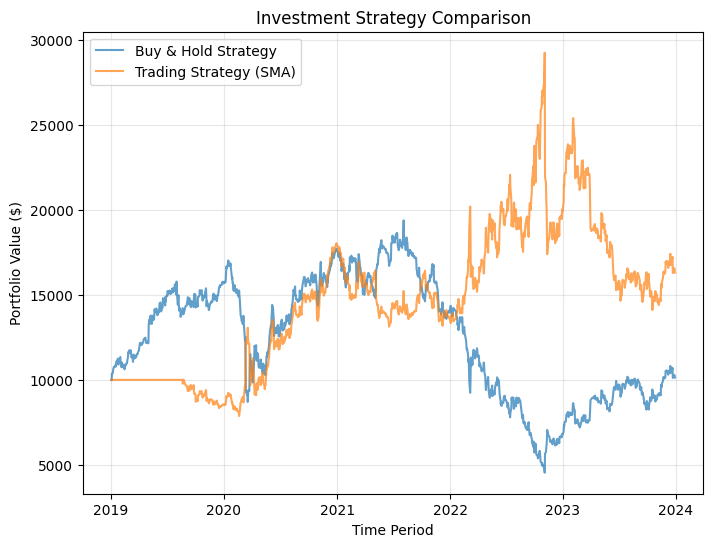

In [37]:
# Plotting both strategies
plt.figure(figsize=(8, 6))
plt.plot(adidas_df['Date'], adidas_df['Buy_Hold_Value'], label='Buy & Hold Strategy', alpha=0.7)
plt.plot(adidas_df['Date'], adidas_df['Trading_Strategy_Value'], label='Trading Strategy (SMA)', alpha=0.7)
plt.title('Investment Strategy Comparison')
plt.xlabel('Time Period')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [38]:
# Compare strategies
print("STRATEGY COMPARISON:")
print(f"Buy & Hold Return: {total_return:.2%}")
print(f"Trading Strategy Return: {trading_return:.2%}")
print(f"Difference: {trading_return - total_return:.2%}")

STRATEGY COMPARISON:
Buy & Hold Return: 0.33%
Trading Strategy Return: 63.18%
Difference: 62.86%


**Remark:** Buy & Hold strategy barely beat inflation over the 5 years.
Meanwhile, the SMA crossover strategy captured profitable trends while avoiding downturns — a huge edge!

### Key Findings

In [39]:
# 3. Adidas Investment Strategy
print("\n3. ADIDAS INVESTMENT STRATEGY")
print("   a) Buy-and-Hold Strategy:")
print(f"      - Initial investment: ${initial_investment:.2f}")
print(f"      - Final value: ${final_value:.2f}")
print(f"      - Total return: {total_return:.2%}")
print("      - Simple, low-cost approach with no transaction fees")

print("\n   b) Trading Strategy (SMA):")
print(f"      - Final portfolio value: ${final_trading_value:.2f}")
print(f"      - Total return: {trading_return:.2%}")
print(f"      - Performance difference: {trading_return - total_return:.2%}")
print("      - More active approach with potential for higher returns in trending markets")


3. ADIDAS INVESTMENT STRATEGY
   a) Buy-and-Hold Strategy:
      - Initial investment: $10000.00
      - Final value: $10032.67
      - Total return: 0.33%
      - Simple, low-cost approach with no transaction fees

   b) Trading Strategy (SMA):
      - Final portfolio value: $16318.24
      - Total return: 63.18%
      - Performance difference: 62.86%
      - More active approach with potential for higher returns in trending markets


In [40]:
# Key Insights
print("\nKEY INSIGHTS:")
print("1. Corporate actions (dividends, splits) have measurable impacts on stock metrics")
print("2. Industry characteristics significantly influence stock behavior and performance")
print("3. Different investment strategies can yield varying results depending on market conditions")
print("4. Long-term investing often provides stable returns with lower transaction costs")
print("5. Technical trading strategies can potentially outperform buy-and-hold in certain market conditions")


KEY INSIGHTS:
1. Corporate actions (dividends, splits) have measurable impacts on stock metrics
2. Industry characteristics significantly influence stock behavior and performance
3. Different investment strategies can yield varying results depending on market conditions
4. Long-term investing often provides stable returns with lower transaction costs
5. Technical trading strategies can potentially outperform buy-and-hold in certain market conditions
